# MLOps Zoomcamp Introduction Homework

### Download yellow trip data Jan and Feb 2023

In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

links = {
    "jan_2023": "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet",
    "feb_2023": "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"
}

df_jan = pd.read_parquet(links["jan_2023"])
df_feb = pd.read_parquet(links["feb_2023"])

In [3]:
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

### Count number of columns

In [4]:
print("Number of columns:", len(df_jan.columns))

Number of columns: 19


### Standard Deviation of duration

In [5]:
df_jan["duration"] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda x: x.total_seconds() / 60)

In [6]:
std = df_jan.duration.std()
print("Standard Deviation of Jan trips duration: ", std.round(2))

Standard Deviation of Jan trips duration:  42.59


### Remove Outlier

In [7]:
df_jan_1_60 = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

In [8]:
fraction = len(df_jan_1_60) / len(df_jan)
print("Fraction of recond:", round(fraction, 2))

Fraction of recond: 0.98


### One-hot encoding

In [9]:
# Cast ID columns as string

features = ['PULocationID', 'DOLocationID']
df_jan_1_60.loc[:, features] = df_jan_1_60[features].astype(str)
df_jan_1_60[features].dtypes


/tmp/ipykernel_68326/2150691442.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['161' '43' '48' ... '114' '230' '262']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jan_1_60.loc[:, features] = df_jan_1_60[features].astype(str)
/tmp/ipykernel_68326/2150691442.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['141' '237' '238' ... '239' '79' '143']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_jan_1_60.loc[:, features] = df_jan_1_60[features].astype(str)


PULocationID    object
DOLocationID    object
dtype: object

In [10]:
# Set dataframe as list dictionaries

dict_feature_jan = df_jan_1_60[features].to_dict(orient="records")

In [11]:
# fit to vectorizer
dv = DictVectorizer()
x_train = dv.fit_transform(dict_feature_jan)
print("Number of dimension", len(dv.get_feature_names_out()))

Number of dimension 515


### Model training

In [12]:
y_train = df_jan_1_60.duration.values

lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [13]:
y_pred = lr.predict(x_train)

rmse_train = root_mean_squared_error(y_train, y_pred)
print("RMSE Train:", round(rmse_train, 3))

RMSE Train: 7.649


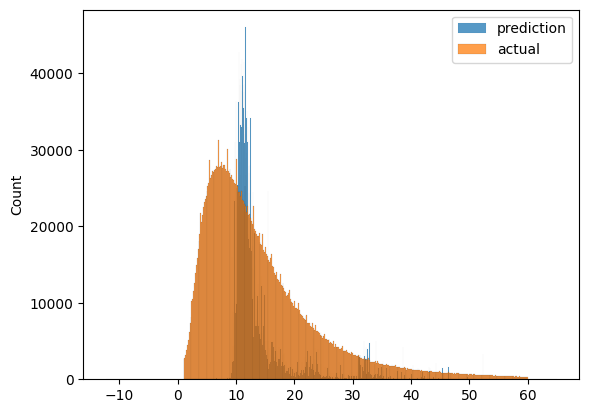

In [14]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

### Model Evaluation

In [15]:
# Preprocess

df_feb["duration"] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda x: x.total_seconds() / 60)
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

In [17]:
features = ['PULocationID', 'DOLocationID']
df_feb.loc[:, features] = df_feb[features].astype(str)
dict_feature_feb = df_feb[features].to_dict(orient="records")
x_test = dv.transform(dict_feature_feb)
y_test = df_feb.duration.values

In [21]:
y_test_pred = model.predict(x_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print("RMSE test:", round(rmse_test, 3))

RMSE test: 7.812


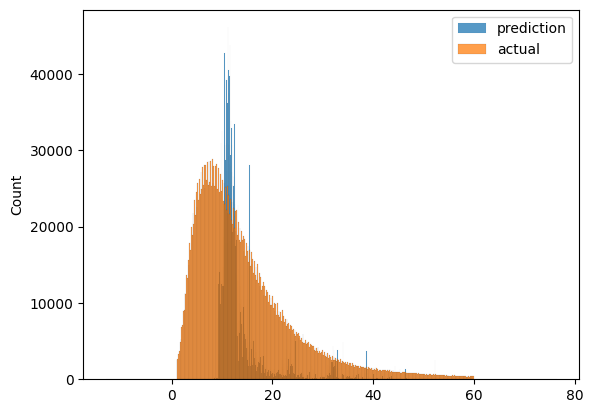

In [22]:
sns.histplot(y_test_pred, label='prediction')
sns.histplot(y_test, label='actual')

plt.legend()